In [ ]:
"""
TOPIC:
            Titanic: Machine Learning from Disaster
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, 
killing 1502 out of 2224 passengers and crew. 
This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. 
Although there was some element of luck involved in surviving the sinking, 
some groups of people were more likely to survive than others, such as women, children, and the upper-class.
"""

In [ ]:
"""
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. 
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
"""

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('/Users/prakashchandraprasad/Documents/kaggle-datasets/titanic/train.csv')

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
col = df.columns
print col

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [37]:
sns.barplot(x='Sex',y='Survived',hue="Pclass",data=df)

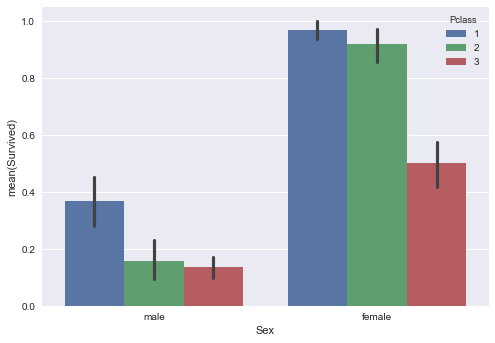

In [38]:
plt.show()

In [39]:
sns.countplot(y="Survived", data=df,hue='Pclass');

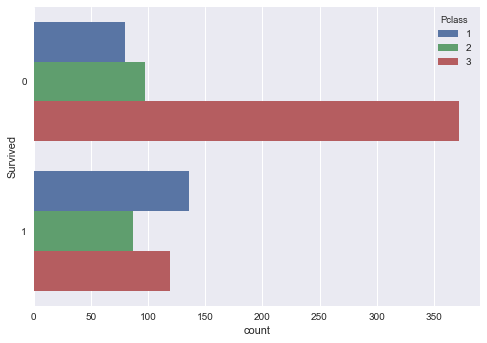

In [40]:
plt.show()

In [41]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [42]:
df['Fare'].fillna(0,inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
enc=LabelEncoder()

In [45]:
df['Sex']=enc.fit_transform(df['Sex'])

In [46]:
X_train=df[['PassengerId','Pclass','SibSp','Parch','Fare','Age','Sex']] # select the required features
y_train=df['Survived']

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()

In [49]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
test_df = pd.read_csv('/Users/prakashchandraprasad/Documents/kaggle-datasets/titanic/test.csv')

In [52]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)

In [54]:
test_df['Sex']=enc.fit_transform(test_df['Sex'])

In [58]:
test_df['Fare'].fillna(0,inplace=True)
X_test = test_df[['PassengerId','Pclass','SibSp','Parch','Fare','Age','Sex']]

In [59]:
prediction = model.predict(X_test)

In [60]:
print prediction

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [61]:
test_df['Survived']=prediction

In [62]:
sns.barplot(x='Sex',y='Survived',hue="Pclass",data=df)

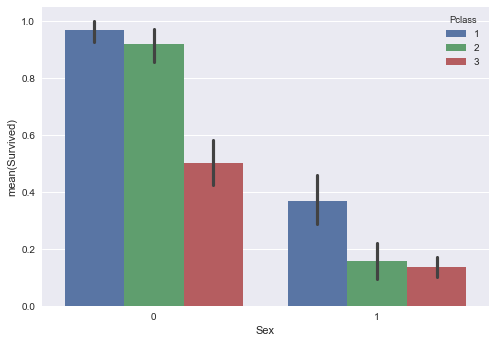

In [63]:
plt.show()

In [64]:
sns.countplot(y="Survived", data=df,hue='Pclass');

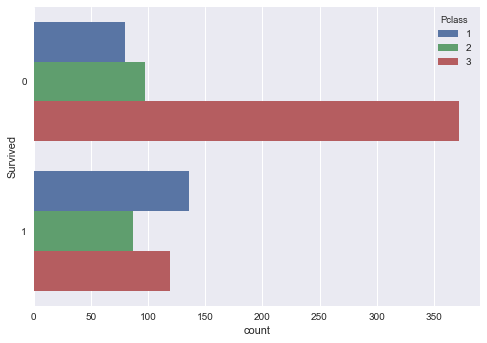

In [65]:
plt.show()